In [15]:
from google.colab import files
import pandas as pd

In [16]:

# Завантажити файли applications.csv та industries.csv
uploaded = files.upload()

Saving industries.csv to industries.csv
Saving applications.csv to applications.csv


In [17]:
# Отримати імена завантажених файлів
file_names = list(uploaded.keys())

In [18]:
# Зчитати файли в Pandas DataFrame
applications_df = pd.read_csv(file_names[0])
industries_df = pd.read_csv(file_names[1])

In [19]:
# Завантаження даних з файлу industries.csv
industries_df = pd.read_csv('industries.csv')

In [21]:
applications_df = pd.read_csv('applications.csv')


In [22]:
applications_df = applications_df.drop_duplicates(subset='applicant_id')


In [23]:
applications_df['External Rating'].fillna(0, inplace=True)


In [24]:
applications_df['Education level'].fillna('Середня', inplace=True)


In [25]:
print(applications_df.head())


            Applied at   Amount  Age   Gender                      Industry  \
0  11.30.2022 10:26:37  12000.0   29  Чоловік                    Blockchain   
1  11.30.2022 10:26:39      NaN   36  Чоловік  Public services / Government   
2  11.30.2022 10:26:58   7500.0   34  Чоловік          Adtech / Advertising   
3  11.30.2022 10:27:31   1500.0   23    Жінка                       Telecom   
4  11.30.2022 10:27:34   8400.0   33    Жінка                    Automotive   

  Marital status  External Rating                       Education level  \
0          Other              8.0  Вища (бакалавр, спеціаліст, магістр)   
1         Single              3.0  Вища (бакалавр, спеціаліст, магістр)   
2         Single              4.0  Вища (бакалавр, спеціаліст, магістр)   
3         Single              0.0  Вища (бакалавр, спеціаліст, магістр)   
4         Single              6.0  Вища (бакалавр, спеціаліст, магістр)   

                      Location                      applicant_id  
0  Іван

In [26]:
applications_df = pd.read_csv('applications.csv')


In [27]:
# Прибирання дублікатів за applicant_id
applications_df = applications_df.drop_duplicates(subset='applicant_id')

In [31]:
# Заповнення відсутніх значень в 'External Rating' нулями
applications_df['External Rating'].fillna(0, inplace=True)

In [32]:
# Заповнення відсутніх значень в 'Education level' текстом “Середня”
applications_df['Education level'].fillna('Середня', inplace=True)

In [33]:
# Розрахунок рейтингу за заданими умовами
applications_df['Rating'] = (applications_df['Amount'].notnull()) & (applications_df['External Rating'] != 0)
applications_df['Rating'] = applications_df.apply(lambda row: row['Amount'] + row['External Rating']
                                                   if row['Rating'] else 0, axis=1)


In [36]:
# Виведення інформації про стовпці для applications_df
print("applications_df:")
print(applications_df.info())

applications_df:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13278 entries, 0 to 13314
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applied at       13278 non-null  object 
 1   Amount           13245 non-null  float64
 2   Age              13278 non-null  int64  
 3   Gender           13278 non-null  object 
 4   Industry         13278 non-null  object 
 5   Marital status   13278 non-null  object 
 6   External Rating  13278 non-null  float64
 7   Education level  13278 non-null  object 
 8   Location         11506 non-null  object 
 9   applicant_id     13278 non-null  object 
 10  Rating           13278 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB
None


In [37]:
# Виведення інформації про стовпці для industries_df
print("\nindustries_df:")
print(industries_df.info())


industries_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Industry  37 non-null     object
 1   Score     37 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes
None


In [39]:
# Замість 'applicant_id' використовуйте 'Industry' для об'єднання
merged_df = pd.merge(applications_df, industries_df, left_on='Industry', right_on='Industry', how='left')


In [40]:
# Виведення перших рядків для перевірки
print("\nmerged_df:")
print(merged_df.head())


merged_df:
            Applied at   Amount  Age   Gender                      Industry  \
0  11.30.2022 10:26:37  12000.0   29  Чоловік                    Blockchain   
1  11.30.2022 10:26:39      NaN   36  Чоловік  Public services / Government   
2  11.30.2022 10:26:58   7500.0   34  Чоловік          Adtech / Advertising   
3  11.30.2022 10:27:31   1500.0   23    Жінка                       Telecom   
4  11.30.2022 10:27:34   8400.0   33    Жінка                    Automotive   

  Marital status  External Rating                       Education level  \
0          Other              8.0  Вища (бакалавр, спеціаліст, магістр)   
1         Single              3.0  Вища (бакалавр, спеціаліст, магістр)   
2         Single              4.0  Вища (бакалавр, спеціаліст, магістр)   
3         Single              0.0  Вища (бакалавр, спеціаліст, магістр)   
4         Single              6.0  Вища (бакалавр, спеціаліст, магістр)   

                      Location                      applicant_

In [42]:
# Розрахунок рейтингу за умовами
rating_conditions = [
    (applications_df['Age'].between(35, 55), 20),
    ((pd.to_datetime(applications_df['Applied at']).dt.weekday < 5), 20),
    (applications_df['Marital status'] == 'Married', 20),
    ((applications_df['Location'].str.contains('Київ|Киев|Kyiv|Kyiv', case=False, na=False)), 10),
    (True, industries_df['Score']),  # Значення 'Score' з таблиці industries.csv
    (applications_df['External Rating'] >= 8, 20),
    (applications_df['External Rating'] <= 2, -20)
]

In [44]:
import numpy as np


In [57]:
# Розрахунок рейтингу за умовами
conditions = [
    (applications_df['Age'].between(35, 55), 20),
    ((pd.to_datetime(applications_df['Applied at']).dt.weekday < 5), 20),
    (applications_df['Marital status'] == 'Married', 20),
    ((applications_df['Location'].str.contains('Київ|Киев|Kyiv|Kyiv', case=False, na=False)), 10),
    (True, industries_df.set_index('Industry')['Score']),  # Значення 'Score' з таблиці industries.csv
    (applications_df['External Rating'] >= 8, 20),
    (applications_df['External Rating'] <= 2, -20)
]

In [58]:
# Розрахунок рейтингу за умовами
applications_df['Rating'] = 0
for cond, points in conditions:
    if isinstance(points, pd.Series):
        applications_df['Rating'] += applications_df['Industry'].map(points).fillna(0)
    else:
        applications_df['Rating'] += np.where(cond, points, 0)

In [59]:
# Обмеження рейтингу в межах від 0 до 100
applications_df['Rating'] = applications_df['Rating'].clip(0, 100)

In [60]:
# Виведення перших рядків для перевірки
print(applications_df.head())

            Applied at   Amount  Age   Gender                      Industry  \
0  11.30.2022 10:26:37  12000.0   29  Чоловік                    Blockchain   
1  11.30.2022 10:26:39      NaN   36  Чоловік  Public services / Government   
2  11.30.2022 10:26:58   7500.0   34  Чоловік          Adtech / Advertising   
3  11.30.2022 10:27:31   1500.0   23    Жінка                       Telecom   
4  11.30.2022 10:27:34   8400.0   33    Жінка                    Automotive   

  Marital status  External Rating                       Education level  \
0          Other              8.0  Вища (бакалавр, спеціаліст, магістр)   
1         Single              3.0  Вища (бакалавр, спеціаліст, магістр)   
2         Single              4.0  Вища (бакалавр, спеціаліст, магістр)   
3         Single              0.0  Вища (бакалавр, спеціаліст, магістр)   
4         Single              6.0  Вища (бакалавр, спеціаліст, магістр)   

                      Location                      applicant_id  Rating  

In [61]:
import matplotlib.pyplot as plt


In [64]:
# Відфільтруємо заявки з рейтингом більше нуля
accepted_applications = applications_df[applications_df['Rating'] > 0].copy()


In [65]:
# Конвертуємо 'Applied at' в тип datetime та визначимо тиждень подачі заявки
accepted_applications['Applied at'] = pd.to_datetime(accepted_applications['Applied at'])
accepted_applications['Week'] = accepted_applications['Applied at'].dt.isocalendar().week

In [66]:
# Згрупуємо за тижнем та розрахуємо середній рейтинг
weekly_avg_rating = accepted_applications.groupby('Week')['Rating'].mean()

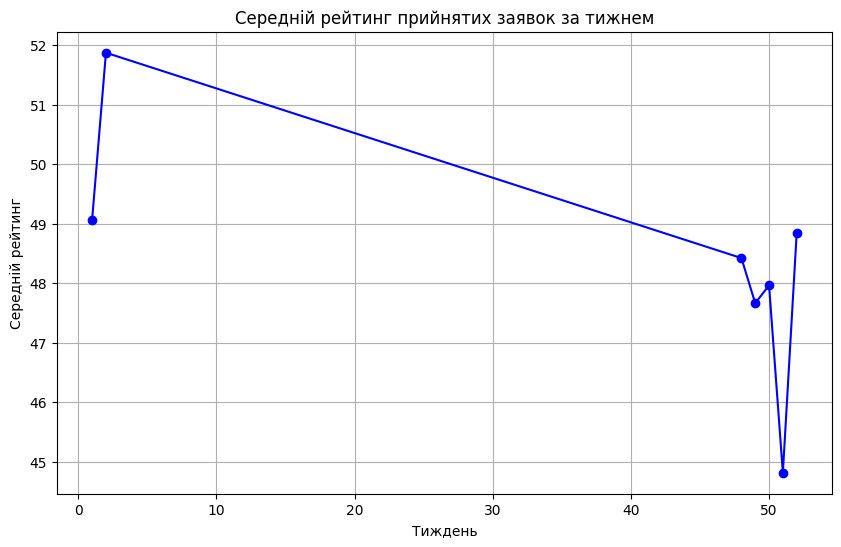

In [67]:
# Виведемо дані на графік
plt.figure(figsize=(10, 6))
plt.plot(weekly_avg_rating.index, weekly_avg_rating.values, marker='o', linestyle='-', color='b')
plt.title('Середній рейтинг прийнятих заявок за тижнем')
plt.xlabel('Тиждень')
plt.ylabel('Середній рейтинг')
plt.grid(True)
plt.show()